In [1]:
using Plots
using Pkg; Pkg.add("SharedArrays")
using Transducers
using FileIO
using Distributed
using SharedArrays

addprocs(2)
#using Threads

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


2-element Vector{Int64}:
 2
 3

In [2]:
#include("aux_functions.jl")
@everywhere include_string(Main, $(read("aux_functions.jl", String)), "aux_functions.jl")

In [3]:
order = 1
const L = 5
#N = 80000
const N = 20000
const J = 50
const κ = 2π/L # for Fourier Transform
dx = L/J
x = [dx*(i-1) for i in 1:J] ;
p = (L, N, J, κ, dx, order)

(5, 20000, 50, 1.2566370614359172, 0.1, 1)

In [4]:
par_dis = load("Initial_Distributions/par_dis_L5_N2_5_theta001.jld2", "par_dis");

In [5]:
pars = Vector{Particles}(undef, N)


make_particles!(par_dis,pars)


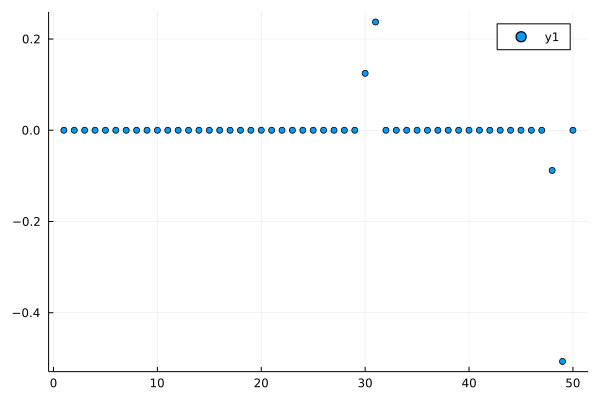

In [6]:
SM = SharedArray{Float64}(J)

@distributed (+) for i in 1:N
    get_mini_current(pars[i], SM, p)
end

scatter(SM)

In [26]:
SM

50-element SharedVector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
S = SharedArray{Float64}(J)

function get_current_parr!(u, S, p)
    L, N, J, κ, dx, order = p
    r = view(u,1:N)
    v = view(u,N+1:2N)
    fill!(S,0.0)
  
    @distributed (+) for i in 1:N
      j, y = get_index_and_y(r[i],J,L)
      for l in (-order):order 
        S[mod1(j + l, J)] += W(order, -y + l) * v[i] / dx;
      end
    end
  end




get_current_parr!(par_dis, S, p)

TaskFailedException: TaskFailedException

    nested task error: On worker 2:
    MethodError: no method matching +(::Nothing, ::Nothing)
    Closest candidates are:
      +(::Any, ::Any, !Matched::Any, !Matched::Any...) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
      +(!Matched::Union{InitialValues.NonspecificInitialValue, InitialValues.SpecificInitialValue{typeof(+)}}, ::Any) at ~/.julia/packages/InitialValues/P5PLf/src/InitialValues.jl:153
      +(!Matched::ChainRulesCore.AbstractThunk, ::Any) at ~/.julia/packages/ChainRulesCore/sHMAp/src/tangent_arithmetic.jl:122
      ...
    Stacktrace:
     [1] #9
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/macros.jl:291
     [2] #106
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/process_messages.jl:278
     [3] run_work_thunk
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/process_messages.jl:63
     [4] macro expansion
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/process_messages.jl:278 [inlined]
     [5] #105
       @ ./task.jl:423
    Stacktrace:
     [1] remotecall_fetch(::Function, ::Distributed.Worker, ::Function, ::Vararg{Any}; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
       @ Distributed /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/remotecall.jl:452
     [2] remotecall_fetch
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/remotecall.jl:444 [inlined]
     [3] #remotecall_fetch#158
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/remotecall.jl:479 [inlined]
     [4] remotecall_fetch
       @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/remotecall.jl:479 [inlined]
     [5] (::Distributed.var"#169#170"{typeof(+), var"#9#10"{SharedVector{Float64}, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}, SubArray{Float64, 1, Vector{Float64}, Tuple{UnitRange{Int64}}, true}, Int64, Float64, Int64, Int64}, UnitRange{Int64}, Vector{UnitRange{Int64}}, Int64, Int64})()
       @ Distributed /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/macros.jl:270

Unhandled Task ERROR: On worker 2:
UndefVarError: #get_index_and_y not defined
Stacktrace:
  [1] deserialize_datatype
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Serialization/src/Serialization.jl:1332
  [2] handle_deserialize
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Serialization/src/Serialization.jl:854
  [3] deserialize
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Serialization/src/Serialization.jl:801
  [4] handle_deserialize
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Serialization/src/Serialization.jl:861
  [5] deserialize
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Serialization/src/Serialization.jl:801 [inlined]
  [6] deserialize_global_from_main
    @ /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/Distributed/src/clusterserialize.jl:160
  [7] #3
    @ /A

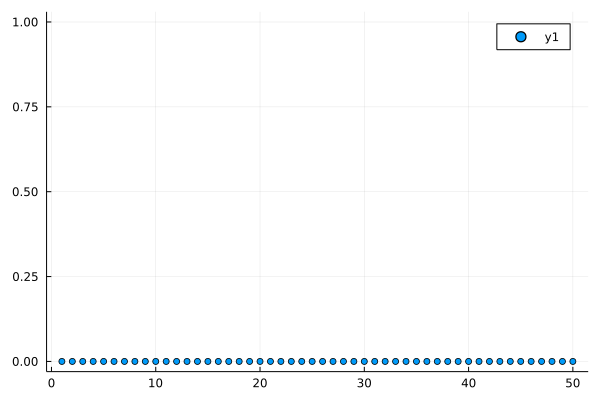

In [17]:
scatter(S)

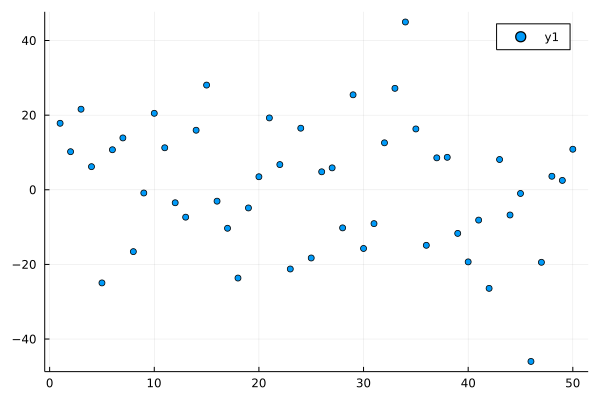

In [55]:



SS = zeros(J)
SST = zeros(J)
S_old = zeros(J);
get_current!(par_dis,S_old,p)
scatter(S_old)

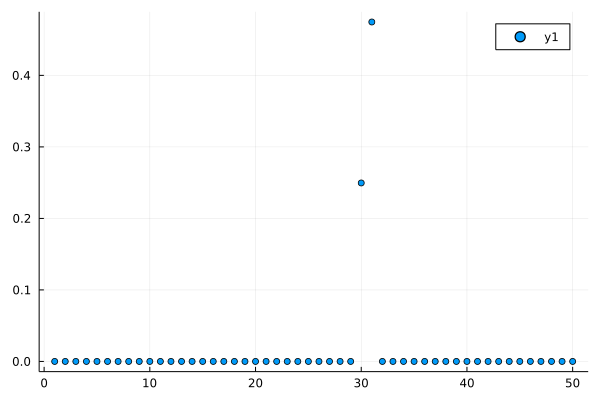

In [63]:


S = zeros(J)

for i in 1:N
    S = S + get_mini_current(pars[i],S,p)
end

scatter(S)


In [36]:
#scatter(get_mini_current(pars[2],SS,p))

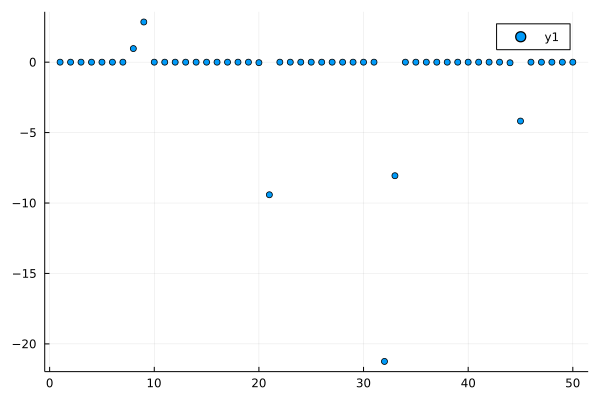

In [47]:
#scatter(S_old)


In [ ]:


SS = foldl(+, Map(x -> get_mini_current(x,SS,p)), pars)
#SST = foldxt(+, Map(x -> get_mini_current(x,SST,p)), pars);

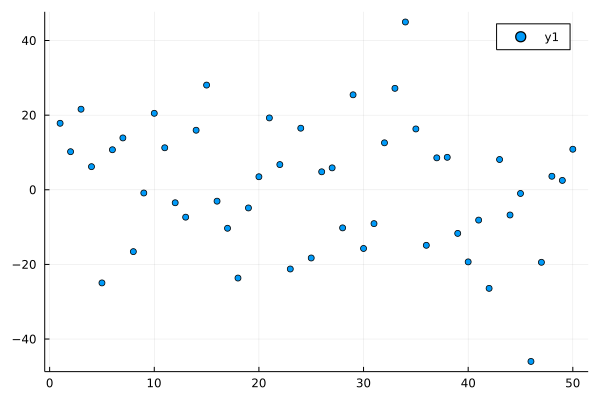

In [11]:

#scatter(SS)
#scatter!(SST)
scatter(S_old)

In [ ]:
function get_current_par!(u, S, p, th)
    L, N, J, κ, dx, order, nth = p
    #th = threadid()
    #nth = nthreads()
    NT = N ÷ nth
    r = view(u,(th-1)*NT+1:NT*th)
    v = view(u,N+(th-1)*NT+1:N+NT*th)
    fill!(S[:,th],0.0)
  
    for i in 1:N
      j, y = get_index_and_y(r[i],J,L)
      for l in (-order):order 
        S[mod1(j + l, J),th] += W(order, -y + l) * v[i] / dx;
      end
    end
    return S[:]
  end